## Desafio Cientista de Dados

#### Introdução

Para um estúdio de Hollywood como a PProductions, a decisão de qual filme produzir a seguir representa um investimento de milhões de dólares e um risco considerável. Em uma indústria tão competitiva, depender apenas da intuição já não é suficiente para garantir o sucesso. Este projeto busca usar da ciência de dados para analisar um rico banco de dados cinematográfico do IMDB para orientar qual o manual para se obter resultados positivos tanto em termos de faturamento quanto de aclamação do público. Para atingir esse objetivo, este relatório detalha uma jornada analítica completa. Começamos com uma Análise Exploratória de Dados para descobrir as principais características de filmes bem-sucedidos. Em seguida, desenvolvemos e otimizamos um modelo preditivo de machine learning, capaz de estimar a nota do IMDB de um filme com alta precisão. Através deste processo, buscamos fornecer à PProductions não apenas uma recomendação, mas um framework baseado em dados para orientar suas futuras decisões criativas e financeiras.

#### Sumário
1. Análise do DataFrame
2. Tratamento de Dados Ausentes
3. Engenharia de Features
4. Treinamento e avaliação dos modelos
5. Ajuste de Hiperparâmetros com GridSearchCV
6. Preparação dos Dados para a Previsão Final¶
7. Conclusão

In [1]:
# Manipulação e Análise de Dados
import pandas as pd
import numpy as np
from collections import Counter

# Ciar gráficos e explorar os dados visualmente
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud

# Pré-processamento e Engenharia de Features
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Seleção e Avaliação de Modelos
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Processamento de Linguagem Natural (NLP)
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import re

# Outras Bibliotecas
import networkx as nx
import datetime
import warnings
import joblib

In [2]:
# Importar o dataframe.
df = pd.read_csv('desafio_indicium_imdb.csv')

In [3]:
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

### 1. Análise do DataFrame 

In [4]:
# Verificar o formato do dataframe.
df.shape

(999, 16)

In [5]:
print(f'Número de colunas:', df.shape[0])
print(f'Número de linhas:', df.shape[1])

Número de colunas: 999
Número de linhas: 16


In [6]:
# Prévia do dataframe.
df.head(5)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [7]:
df.tail(5)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
994,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
998,999,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


In [8]:
# Informações sobre as colunas.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [9]:
# Varificar a quantidade de valores nulos.
df.isnull().sum().sort_values(ascending=False).head(3)

Gross          169
Meta_score     157
Certificate    101
dtype: int64

In [10]:
# Porcentagem de valores nulos.
df_nulos = df.isnull().sum() * 100 / len(df)
nulos_porcent = df_nulos.sort_values(ascending=False).head(3)
print(nulos_porcent)

Gross          16.916917
Meta_score     15.715716
Certificate    10.110110
dtype: float64


<Axes: >

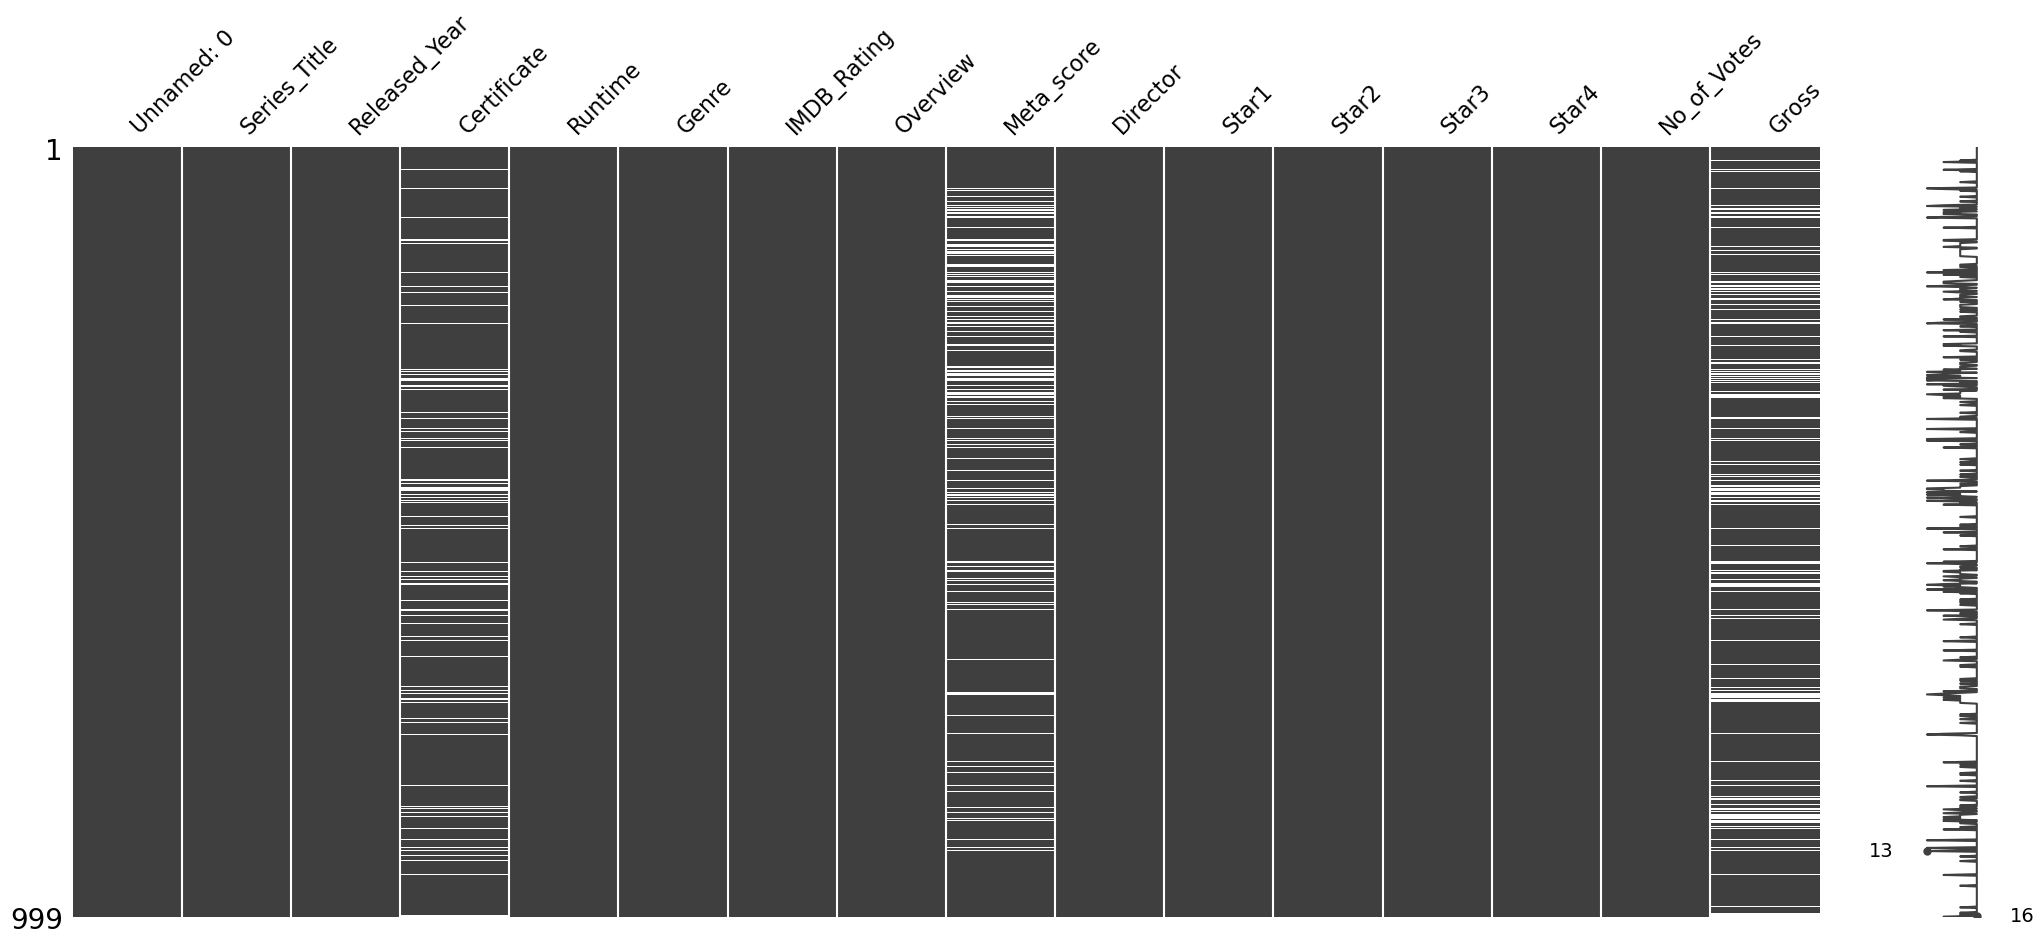

In [11]:
# Representação gráfica dos valores ausentes no dataframe.
msno.matrix(df)

#### Visão geral do DataFrame

| Nome da Coluna | Tipo de Dado | Descrição | Exemplo |
| --- | --- | --- | --- |
| Series_Title | object | Nome do filme | 'The Godfather' |
| Released_Year | object | Ano de lançamento | '1972' |
| Certificate | object | Classificação etária | 'A', 'UA |
| Runtime | object | Tempo de duração | '201 min' |
| Genre | object | Gênero(s) do filme | 'Action, Adventure, Drama' |
| IMDB_Rating | float64 | Nota do IMDB | '8.9' |
| Overview | object | Sinopse do filme | 'Gandalf and Aragorn lead the World of Men...' |
| Meta_score | float64 | Média ponderada de todas as críticas | '96.0' |
| Director | object | Diretor do filme | 'Christopher Nolan' |
| Star1 | object | Ator/atriz #1 | 'Al Pacino' |
| Star2 | object | Ator/atriz #2 | 'Robert De Niro' |
| Star3 | object | Ator/atriz #3 | 'Martin Balsam' |
| Star4 | object | Ator/atriz #4 | 'Orlando Bloom' |
| No_of_Votes | int64 | Número de votos | '1129952' |
| Gross | object | Faturamento | '377,845,905' |

##### Com base nesta análise inicial:
* As colunas *'Certificate', 'Meta_score'* e *'Gross'* têm valores ausentes que podem ser preenchidos ou removidos. Quantidade de valores precisarão de tratamento em cada uma das colunas mencionadas:
* As colunas *'Released_Year', 'Runtime'* e *'Gross'* precisam ser convertidas para tipos numéricos *(int ou float)* para permitir cálculos estatísticos.
* A coluna *'Unnamed: 0'* é um índice sem nome, usado para identificar as linhas e que pode ser desconsiderado.

### 2. Tratamento de Dados Ausentes

In [12]:
df[['Meta_score', 'Certificate', 'Gross']].describe(include='all')

,Meta_score,Certificate,Gross
count,842.000000,898,830
unique,NaN,16,822
top,NaN,U,"4,360,000"
freq,NaN,234,5
mean,77.969121,NaN,NaN
std,12.383257,NaN,NaN
min,28.000000,NaN,NaN
25%,70.000000,NaN,NaN
50%,79.000000,NaN,NaN
75%,87.000000,NaN,NaN


In [13]:
# --- Limpeza da coluna 'Gross' ---
# Para a coluna 'Gross' (faturamento), substituímos os valores nulos pela mediana,
# pois o faturamento dos filmes apresenta grande variação, com alguns arrecadando quantias enormes.
# A mediana lida melhor com esses valores muito diferentes.
df['Gross'] = df['Gross'].str.replace(',', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# Preencher os valores nulos com a mediana.
median_gross = df['Gross'].median()
df['Gross'] = df['Gross'].fillna(median_gross)

In [14]:
# --- Limpeza da coluna 'Meta_score' ---
# Preencher os valores nulos com a mediana pelo mesmo motivo da coluna 'Gross'.
median_meta_score = df['Meta_score'].median()
df['Meta_score'] = df['Meta_score'].fillna(median_meta_score)

# Normalizar o Meta_score para uma escala de 0 a 10
df['Meta_score_Normalized'] = df['Meta_score'] / 10

In [15]:
# --- Limpeza da coluna 'Certificate' ---
# Como 'Certificate' é uma variável categórica, substituímos pelo valor mais frequente na coluna.
# Preencher os valores nulos com a moda.
mode_certificate = df['Certificate'].mode()[0]
df['Certificate'] = df['Certificate'].fillna(mode_certificate)

In [16]:
# --- Limpeza da coluna 'Runtime' ---
# Remover o texto ' min' e converter para numérico.
df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=True)
df['Runtime'] = pd.to_numeric(df['Runtime'])

In [17]:
# Corrigir erro na linha 965.
print(df.loc[965, ['Series_Title', 'Released_Year', 'Certificate']])

Series_Title     Apollo 13
Released_Year           PG
Certificate              U
Name: 965, dtype: object


In [18]:
df.loc[965, 'Released_Year'] = '1995'

In [19]:
# --- Limpeza da coluna 'Released_Year' ---
# Remover parênteses e converter para numérico.
df['Released_Year'] = df['Released_Year'].str.replace('(', '').str.replace(')', '')
df['Released_Year'] = pd.to_numeric(df['Released_Year'])

In [20]:
# Criar coluna 'Decade'.
df['Decade'] = (df['Released_Year'] // 10) * 10

In [21]:
# Verificar o dataframe após o pré-processamento.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             999 non-null    int64  
 1   Series_Title           999 non-null    object 
 2   Released_Year          999 non-null    int64  
 3   Certificate            999 non-null    object 
 4   Runtime                999 non-null    int64  
 5   Genre                  999 non-null    object 
 6   IMDB_Rating            999 non-null    float64
 7   Overview               999 non-null    object 
 8   Meta_score             999 non-null    float64
 9   Director               999 non-null    object 
 10  Star1                  999 non-null    object 
 11  Star2                  999 non-null    object 
 12  Star3                  999 non-null    object 
 13  Star4                  999 non-null    object 
 14  No_of_Votes            999 non-null    int64  
 15  Gross 

### 3. Engenharia de Features

In [22]:
# Exibir estatísticas descritivas para as colunas numéricas
df[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime', 'Released_Year', 'Decade']].describe()

,IMDB_Rating,Meta_score,No_of_Votes,Gross,Runtime,Released_Year,Decade
count,999.000000,999.000000,9.990000e+02,9.990000e+02,999.000000,999.000000,999.000000
mean,7.947948,78.131131,2.716214e+05,6.053338e+07,122.871872,1991.218218,1986.586587
std,0.272290,11.373766,3.209126e+05,1.014694e+08,28.101227,23.297166,23.189130
min,7.600000,28.000000,2.508800e+04,1.305000e+03,45.000000,1920.000000,1920.000000
25%,7.700000,72.000000,5.547150e+04,5.011838e+06,103.000000,1976.000000,1970.000000
50%,7.900000,79.000000,1.383560e+05,2.345744e+07,119.000000,1999.000000,1990.000000
75%,8.100000,85.500000,3.731675e+05,6.157656e+07,137.000000,2009.000000,2000.000000
max,9.200000,100.000000,2.303232e+06,9.366622e+08,321.000000,2020.000000,2020.000000


In [23]:
# Análisar a correlação entre as variáveis.
df[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime', 'Released_Year', 'Decade']].corr()

,IMDB_Rating,Meta_score,No_of_Votes,Gross,Runtime,Released_Year,Decade
IMDB_Rating,1.000000,0.261010,0.479308,0.088139,0.242751,-0.133355,-0.133380
Meta_score,0.261010,1.000000,-0.028558,-0.051865,-0.026479,-0.293899,-0.296872
No_of_Votes,0.479308,-0.028558,1.000000,0.602705,0.172483,0.246000,0.247796
Gross,0.088139,-0.051865,0.602705,1.000000,0.138628,0.232692,0.228161
Runtime,0.242751,-0.026479,0.172483,0.138628,1.000000,0.165831,0.169485
Released_Year,-0.133355,-0.293899,0.246000,0.232692,0.165831,1.000000,0.992495
Decade,-0.133380,-0.296872,0.247796,0.228161,0.169485,0.992495,1.000000


In [24]:
# Calcular a correlação entre IMDB_Rating e Meta_score.
correlation = df['IMDB_Rating'].corr(df['Meta_score'])

# Exibir o resultado.
print(f"O coeficiente de correlação é: {correlation:.4f}")

O coeficiente de correlação é: 0.2610


##### Principais observações:
* O valor de 0.2610 (correlação positiva fraca) sugere que há uma tendência de que filmes bem avaliados pelo público também sejam bem avaliados pelos críticos, mas essa relação não é muito forte. Em outras palavras, ou seja, a opinião do público e a dos críticos se alinham de maneira razoável.
* Existe uma diferença entre as preferências do público em geral e a avaliação dos especialistas.

In [25]:
# Calcular a diferença entre a nota do público e a nota dos críticos.
df['Score_Difference'] = df['IMDB_Rating'] - df['Meta_score_Normalized']

In [26]:
# --- Filmes amados pelo público, mas odiados pela crítica ---
loved_by_public = df.sort_values(by='Score_Difference', ascending=False).head(5)
print(loved_by_public[['Series_Title', 'IMDB_Rating', 'Meta_score', 'Score_Difference']])

             Series_Title  IMDB_Rating  Meta_score  Score_Difference
787              I Am Sam          7.7        28.0               4.9
355        Tropa de Elite          8.0        33.0               4.7
941  The Butterfly Effect          7.6        30.0               4.6
916          Seven Pounds          7.6        36.0               4.0
734           Kai po che!          7.7        40.0               3.7


 São filmes que, apesar de terem sido mal avaliados pela crítica, conseguiram conquistar o público.

In [27]:
# --- Filmes amados pela crítica, mas odiados pelo público ---
loved_by_critics = df.sort_values(by='Score_Difference', ascending=True).head(5)
print(loved_by_critics[['Series_Title', 'IMDB_Rating', 'Meta_score', 'Score_Difference']])

               Series_Title  IMDB_Rating  Meta_score  Score_Difference
490                 Boyhood          7.9       100.0              -2.1
558               Notorious          7.9       100.0              -2.1
713       The Lady Vanishes          7.8        98.0              -2.0
993      A Hard Day's Night          7.6        96.0              -2.0
439  Sweet Smell of Success          8.0       100.0              -2.0


A nota do *IMDb* para estes filmes, embora ainda alta, é significativamente menor que o *Meta_score*, o que pode refletir o gosto mais nichado dos críticos em relação ao público em geral.

In [28]:
df['Genre']

0                  Crime, Drama
1          Action, Crime, Drama
2                  Crime, Drama
3                  Crime, Drama
4      Action, Adventure, Drama
                 ...           
994      Comedy, Drama, Romance
995              Drama, Western
996         Drama, Romance, War
997                  Drama, War
998    Crime, Mystery, Thriller
Name: Genre, Length: 999, dtype: object

In [29]:
# A coluna 'Genre' possui diversos valores.
df['Genre'].unique()

array(['Crime, Drama', 'Action, Crime, Drama', 'Action, Adventure, Drama',
       'Biography, Drama, History', 'Action, Adventure, Sci-Fi', 'Drama',
       'Drama, Romance', 'Western', 'Action, Sci-Fi',
       'Biography, Crime, Drama', 'Action, Adventure, Fantasy',
       'Comedy, Drama, Thriller', 'Adventure, Drama, Sci-Fi',
       'Animation, Adventure, Family', 'Drama, War',
       'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


In [30]:
# Separar e contar cada gênero.
all_genres = []
for genres in df['Genre']:
    all_genres.extend([genre.strip() for genre in genres.split(',')])

In [31]:
genre_soma = pd.Series(all_genres).value_counts()
genre_soma.head()

Drama        723
Comedy       233
Crime        209
Adventure    196
Action       189
Name: count, dtype: int64

In [32]:
len(genre_soma)

21

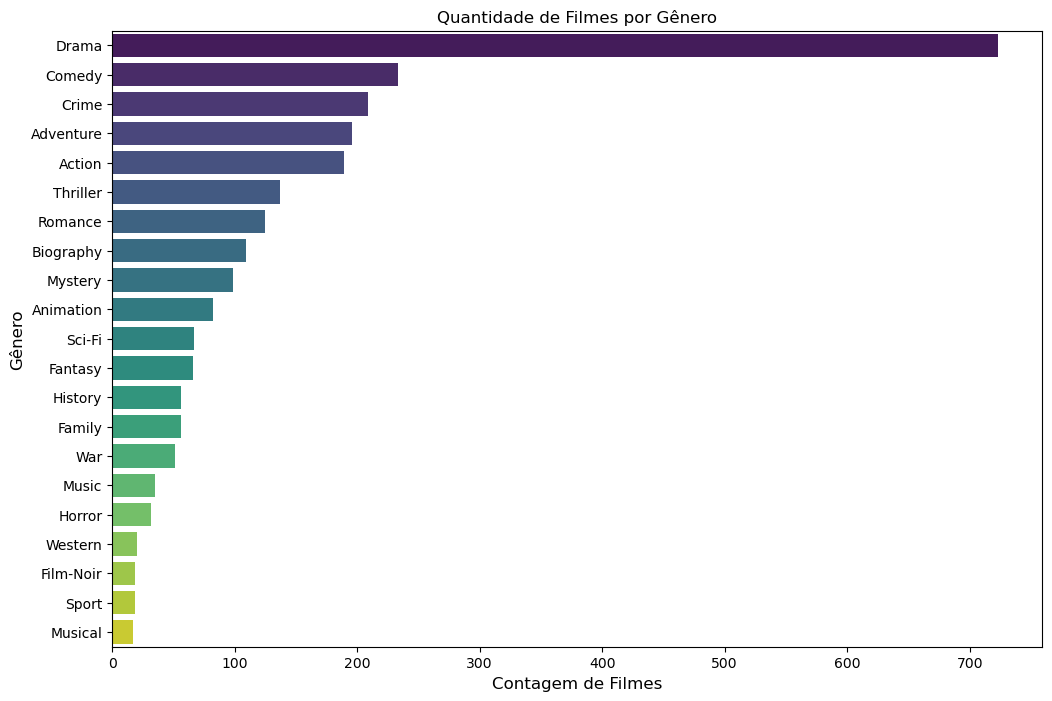

In [33]:
# --- Gráfico de barras ---
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_soma.values, y=genre_soma.index, hue=genre_soma.index, palette='viridis', legend=False)
plt.title('Quantidade de Filmes por Gênero', fontsize=12)
plt.xlabel('Contagem de Filmes', fontsize=12)
plt.ylabel('Gênero', fontsize=12)
plt.savefig('qt_genres.png')
plt.show()

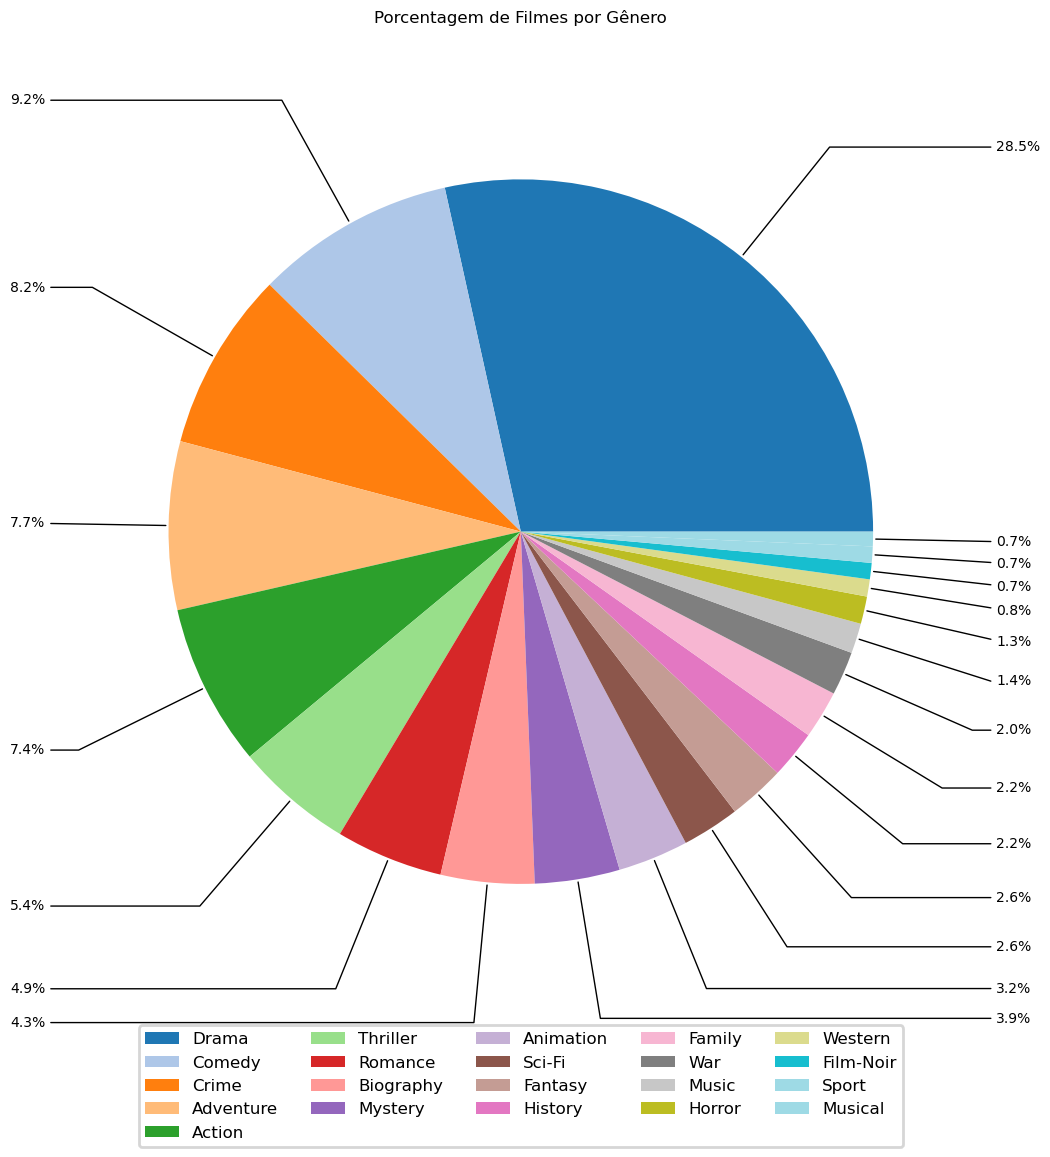

In [34]:
# Calcular porcentagem.
labels = genre_soma.index
sizes = genre_soma.values

total = sum(sizes)
percentagem = [f'{(size/total)*100:.1f}%' for size in sizes]

# --- Gráfico de setores ---
colors = cm.tab20(np.linspace(0, 1, len(labels)))
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts = ax.pie(sizes, labels=None, rotatelabels=45, startangle=0, colors=colors)

# Adicionar porcentagens com setas para fora do gráfico.
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="gray", lw=0.8)
kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va='center')
for i, p in enumerate(wedges):
    angle = (p.theta2 - p.theta1) / 2. + p.theta1
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={angle}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(percentagem[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

# Legendas e edições finais.
legend = ax.legend(wedges, labels, loc='lower center', bbox_to_anchor=(0.5, -0.31), ncol=5, fontsize=12)
legend.get_frame().set_linewidth(2)
plt.axis('equal')
plt.title('Porcentagem de Filmes por Gênero', y=1.15)
plt.savefig('porcent_genres.png')
plt.show()

In [35]:
df_genre_analysis = df.copy()
df_genre_analysis['Genre'] = df_genre_analysis['Genre'].str.split(', ')
df_exploded = df_genre_analysis.explode('Genre')

In [36]:
# Análise de faturamento e nota média por gênero.
genre_agg_df = df_exploded.groupby('Genre').agg(
    Avg_IMDB_Rating=('IMDB_Rating', 'mean'),
    Avg_Gross=('Gross', 'mean'),
    Count=('Genre', 'count')
).sort_values(by='Count', ascending=False)
print(genre_agg_df)

           Avg_IMDB_Rating     Avg_Gross  Count
Genre                                          
Drama             7.957538  4.211394e+07    723
Comedy            7.903433  5.679461e+07    233
Crime             7.954545  3.754874e+07    209
Adventure         7.952041  1.468582e+08    196
Action            7.948677  1.206742e+08    189
Thriller          7.909489  5.173562e+07    137
Romance           7.925600  3.792504e+07    125
Biography         7.935780  5.146353e+07    109
Mystery           7.967677  3.857485e+07     99
Animation         7.930488  1.088498e+08     82
Sci-Fi            7.977612  1.368710e+08     67
Fantasy           7.931818  9.571390e+07     66
Family            7.912500  8.300763e+07     56
History           7.953571  4.809190e+07     56
War               8.013725  3.406473e+07     51
Music             7.914286  3.237899e+07     35
Horror            7.887500  3.483207e+07     32
Western           8.000000  4.750656e+07     20
Film-Noir         7.989474  1.269749e+07

##### Principais observações:
* O gênero *Drama* é o mais frequente na amostra, com 723 filmes, mas seu faturamento médio é significativamente menor em comparação a outros gêneros.
* Os gêneros com maior faturamento médio são *Adventure*, *Sci-Fi* e *Action*.
* Em relação à nota média do *IMDb*, os gêneros *War* e *Western* se destacam, mas com um número menor de filmes, o que pode influenciar essa média.

In [37]:
# --- Criação da coluna 'Idade_do_Filme' ---
# Verificar se filmes mais antigos são realmente mais aclamados.
current_year = datetime.datetime.now().year
df['Idade_do_Filme'] = current_year - df['Released_Year']

# Análisar correlação
df['Gross'] = df['Gross'].fillna(df['Gross'].median())
correlation_with_rating = df['Idade_do_Filme'].corr(df['IMDB_Rating'])
correlation_with_gross = df['Idade_do_Filme'].corr(df['Gross'])
print(f"Correlação entre 'Idade do Filme' e 'IMDB_Rating': {correlation_with_rating:.4f}")
print(f"Correlação entre 'Idade do Filme' e 'Faturamento (Gross)': {correlation_with_gross:.4f}")

Correlação entre 'Idade do Filme' e 'IMDB_Rating': 0.1334
Correlação entre 'Idade do Filme' e 'Faturamento (Gross)': -0.2327


In [38]:
# Exibir as primeiras linhas com a nova coluna
print(df[['Released_Year', 'Idade_do_Filme']].head(5))

   Released_Year  Idade_do_Filme
0           1972              53
1           2008              17
2           1974              51
3           1957              68
4           2003              22


##### Principais observações:
* A correlação entre a *'Idade do Filme'* e a Nota do *IMDb* é de 0.1334, ou seja, filmes mais antigos tendem a ter notas ligeiramente mais altas, mas a relação é tão fraca que a idade do filme não é um fator forte para prever sua nota.
* A correlação entre a *'Idade do Filme'* e o *Faturamento* é de -0.2327, filmes mais recentes tendem a ter um faturamento um pouco mais alto, o que pode refletir fatores como inflação e a evolução dos mercados de cinema.

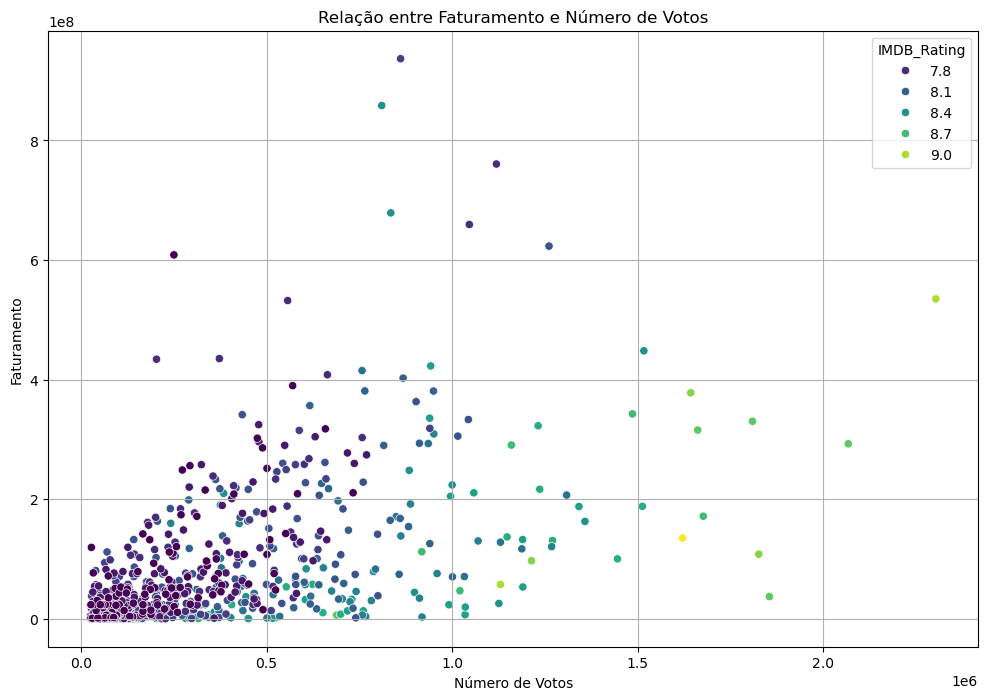

In [39]:
# Gráfico de dispersão para faturamento vs. número de votos.
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='No_of_Votes', y='Gross', hue='IMDB_Rating', palette='viridis')
plt.title('Relação entre Faturamento e Número de Votos')
plt.xlabel('Número de Votos')
plt.ylabel('Faturamento')
plt.grid(True)
plt.savefig('gross_vs_votes_scatterplot.png')
plt.show()

##### Principais observações:
* A maioria dos filmes com as notas mais altas tem um alto número de votos e um faturamento considerável.
* Quanto maior o número de votos, maior tende a ser o faturamento.

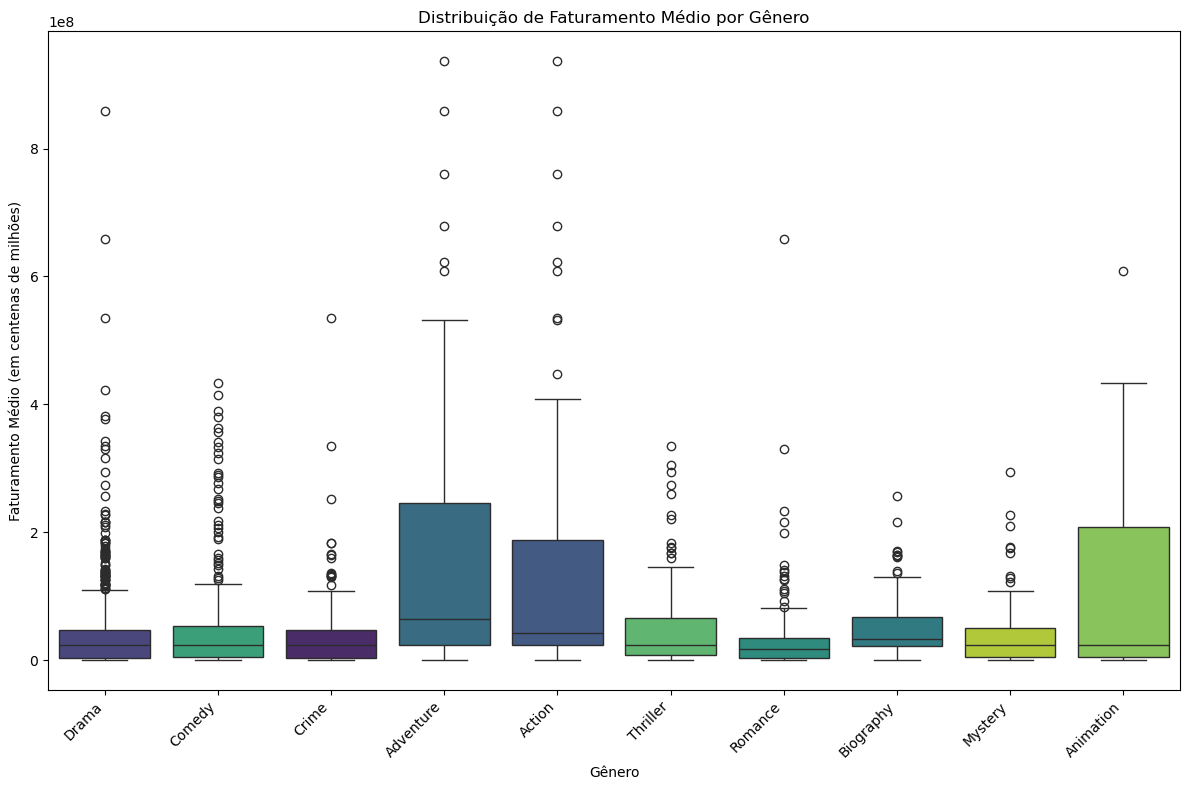

In [40]:
# Faturamento por gênero (top 10 mais frequentes)
top_10_genres = genre_soma.head(10).index.tolist()
df_top_genres = df_exploded[df_exploded['Genre'].isin(top_10_genres)]
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_genres, x='Genre', y='Gross', order=top_10_genres, hue='Genre', palette='viridis', legend=False)
plt.title('Distribuição de Faturamento Médio por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Faturamento Médio (em centenas de milhões)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('gross_by_genre_boxplot.png')
plt.show()

##### Principais observações:
* O faturamento médio mais alto é observado nos gêneros *Action*, *Adventure* e *Sci-Fi*, com a caixa de Adventure mostrando a maior mediana.
* *Drama* e *Comedy* têm um faturamento médio consideravelmente menor, apesar de serem os gêneros mais frequentes.
* O gráfico também revela a existência de filmes com faturamentos extremamente altos em diversos gêneros, como *Animation*.

In [41]:
# Calcular o faturamento médio por década e gênero.
avg_gross_by_decade_genre = df_top_genres.groupby(['Decade', 'Genre'])['Gross'].mean().reset_index()

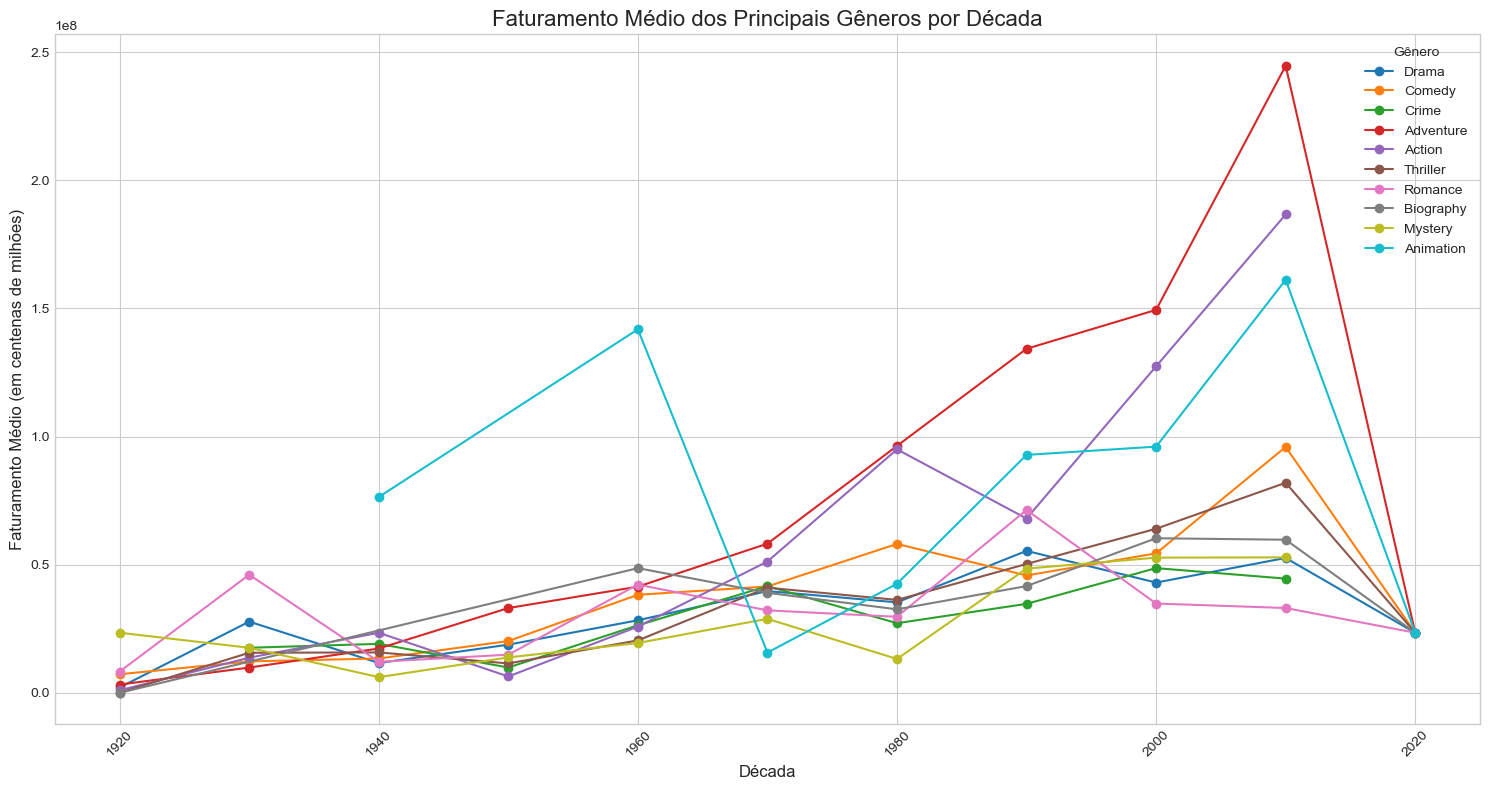

In [42]:
# Criar um gráfico de linhas.
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 8))

# Plotar uma linha para cada um dos 10 principais gêneros.
for genre in top_10_genres:
    genre_data = avg_gross_by_decade_genre[avg_gross_by_decade_genre['Genre'].str.contains(genre)]
    plt.plot(genre_data['Decade'], genre_data['Gross'], marker='o', linestyle='-', label=genre)

plt.title('Faturamento Médio dos Principais Gêneros por Década', fontsize=16)
plt.xlabel('Década', fontsize=12)
plt.ylabel('Faturamento Médio (em centenas de milhões)', fontsize=12)
plt.legend(title='Gênero')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('faturamento_medio_generos_decada.png')

##### Principais observações:
* Todos os gêneros apresentam um aumento no faturamento médio ao longo das décadas. Esse crescimento pode ser atribuído a fatores como a inflação e a expansão do mercado cinematográfico global, como já dito anteriormente.
* Os gêneros *Action* e *Adventure* demonstram um crescimento mais acentuado, especialmente nas décadas mais recentes, consolidando-se como os mais lucrativos.
* Embora o *Drama* seja o gênero mais frequente no conjunto de dados, seu faturamento médio tende a ser menor em comparação com os gêneros de grande orçamento.

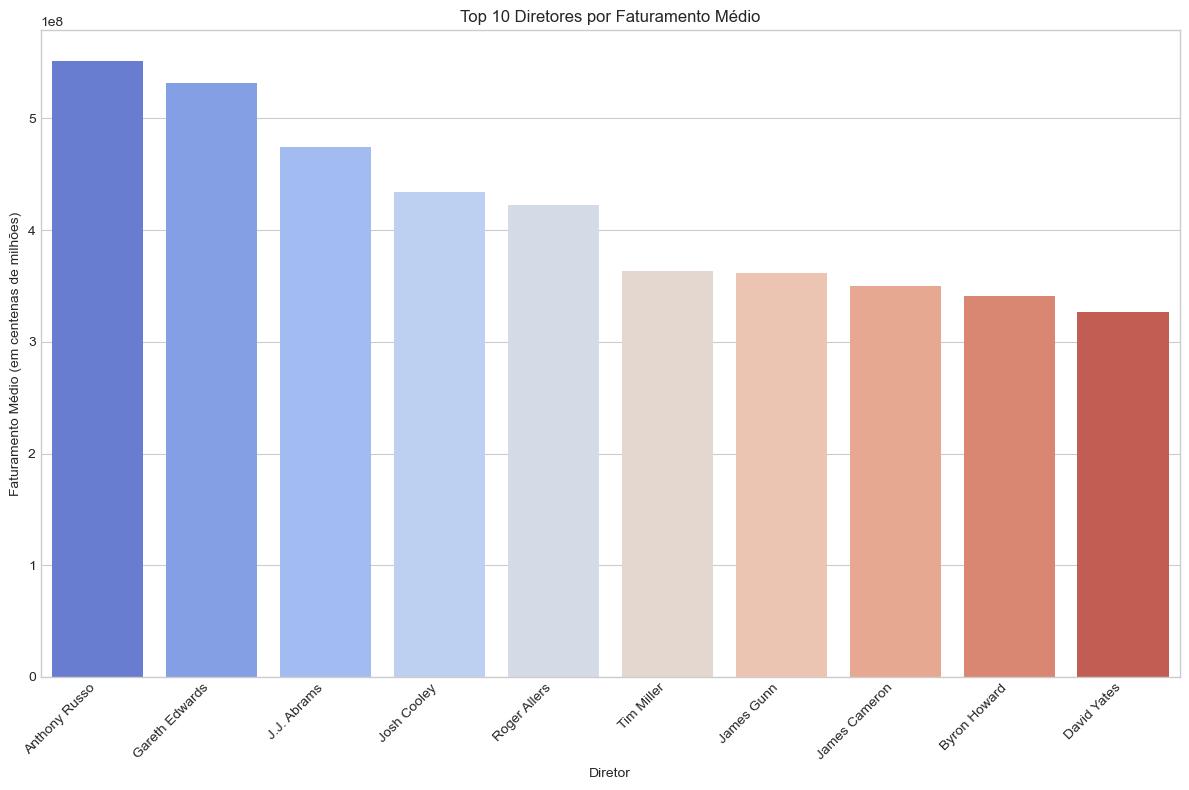

In [43]:
# Diretores com maior faturamento médio.
top_directors = df.groupby('Director')['Gross'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_directors.index, y=top_directors.values, hue=top_directors.index, palette='coolwarm', legend=False)
plt.title('Top 10 Diretores por Faturamento Médio')
plt.xlabel('Diretor')
plt.ylabel('Faturamento Médio (em centenas de milhões)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('gross_by_director_barplot.png')
plt.show()

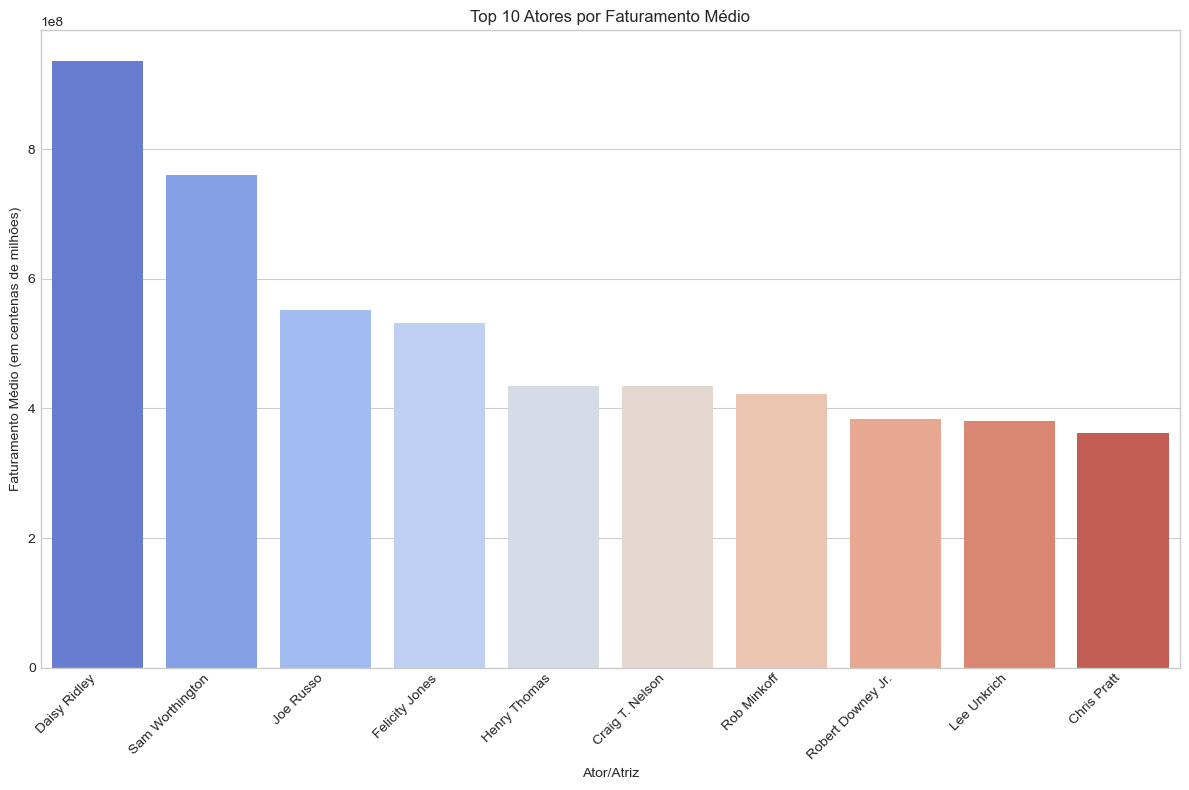

In [44]:
# Atores com maior faturamento médio
top_actors = df.groupby('Star1')['Gross'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_actors.index, y=top_actors.values,  hue=top_actors.index, palette='coolwarm', legend=False)
plt.title('Top 10 Atores por Faturamento Médio')
plt.xlabel('Ator/Atriz')
plt.ylabel('Faturamento Médio (em centenas de milhões)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('gross_by_star_barplot.png')
plt.show()

##### Principais observações:
* Os diretores com os maiores faturamentos médios são *Anthony Russo* e *Joe Russo* (conhecidos por filmes como *Avengers: Endgame*), seguidos por *J.J. Abrams* e *George Lucas* (famosos pela saga *Star Wars*).
* Entre os atores, os maiores faturamentos médios são de *Daisy Ridley* e *Chris Pratt*, que também participam de grandes franquias.

In [45]:
# Verificar frequência que determinado diretor trabalhou com determinado ator.
# Selecionar as colunas de interesse.
df_network = df[['Director', 'Star1']]

# Contar a frequência de cada par diretor-ator.
edge_counts = df_network.groupby(['Director', 'Star1']).size().reset_index(name='count')

# Manter apenas as colaborações que ocorreram mais de uma vez.
# Para evitar acúmulo de dados desnecessários.
top_collaborations = edge_counts[edge_counts['count'] > 1]

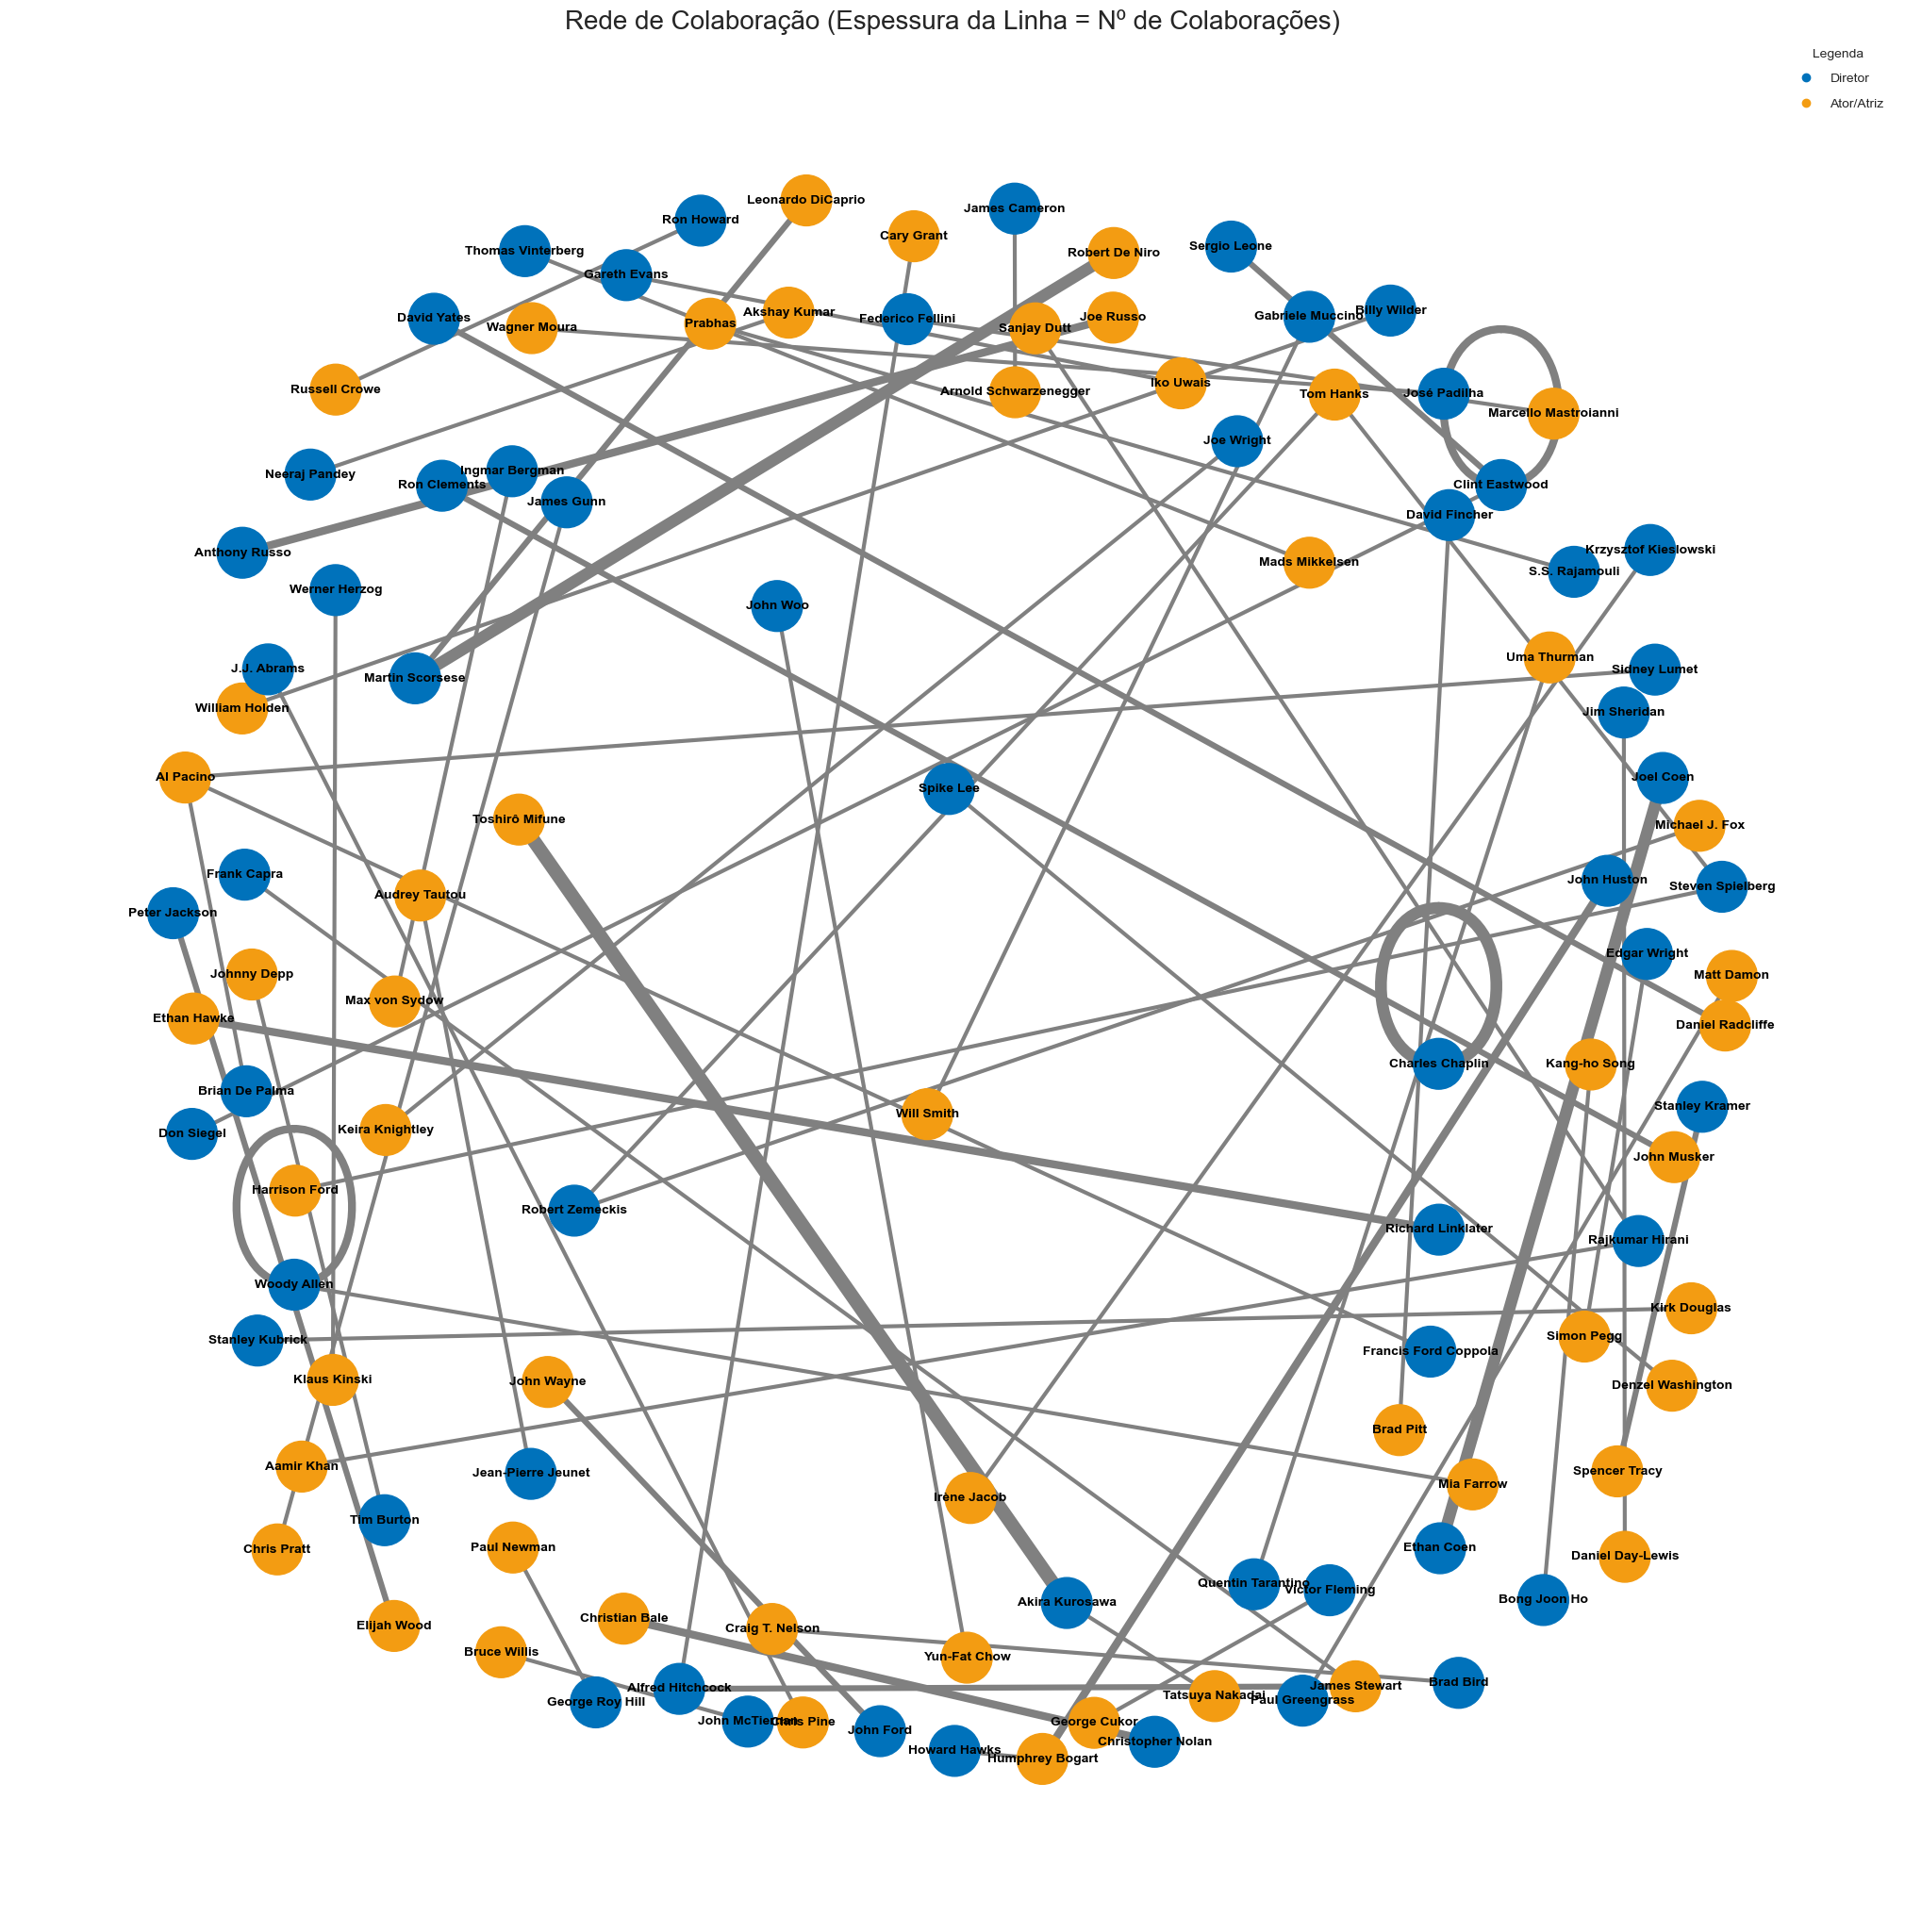

In [46]:
# Criar gráfico.
G = nx.from_pandas_edgelist(top_collaborations, 'Director', 'Star1', ['count'])

# Visualização com matplotlib e espessura da linhas.
# Extrair o número de colaborações das arestas.
weights = [G[u][v]['count'] for u, v in G.edges()]
# Normalizar os pesos para que a visualização fique boa.
scaled_weights = [w * 1.5 for w in weights]
plt.figure(figsize=(20, 20))

# Definir a posição dos nós usando um layout.
pos = nx.spring_layout(G, k=0.75, iterations=20)

# Diferenciar diretores e atores por cor.
directors = top_collaborations['Director'].unique()
color_map = ['#0072BB' if node in directors else '#F39C12' for node in G]

# Desenhar o gráfico.
nx.draw(G, pos,
        with_labels=True,
        node_size=1500,
        node_color=color_map,
        font_size=10,
        font_weight='bold',
        edge_color='grey',
        width=scaled_weights)

# Adicionar legenda.
plt.plot([], [], 'o', color='#0072BB', label='Diretor')
plt.plot([], [], 'o', color='#F39C12', label='Ator/Atriz')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Legenda')
plt.title('Rede de Colaboração (Espessura da Linha = Nº de Colaborações)', size=20)
plt.savefig('diretor_ator_rede_com_espessura.png')

##### Principais Observações:
* Essa análise revela "panelinhas" e parcerias de sucesso em Hollywood, ou seja, duplas de diretor-ator que consistentemente produzem filmes de alta bilheteria ou com altas notas. Diretores como Christopher Nolan e atores como Robert De Niro, por exemplo, podem aparecer conectados por linhas mais robustas, indicando suas múltiplas colaborações de sucesso.

#### **Filmes com maior faturamento tendem a ser dos gêneros *Adventure*, *Sci-Fi* e *Action*, e são frequentemente dirigidos e estrelados por profissionais de grandes franquias de sucesso.**

In [47]:
# --- Popularidade de Diretores e Atores ---
# Média do IMDB Rating e Faturamento por Diretor.
df['Director_Avg_Rating'] = df.groupby('Director')['IMDB_Rating'].transform('mean')
df['Director_Avg_Gross'] = df.groupby('Director')['Gross'].transform('mean')

In [48]:
# Média do IMDB Rating e Faturamento por Ator Principal (Star1).
df['Star1_Avg_Rating'] = df.groupby('Star1')['IMDB_Rating'].transform('mean')
df['Star1_Avg_Gross'] = df.groupby('Star1')['Gross'].transform('mean')

# Exibir as primeiras linhas com as novas features.
print(df[['Director', 'Director_Avg_Rating', 'Director_Avg_Gross', 'Star1', 'Star1_Avg_Rating', 'Star1_Avg_Gross']].head())

               Director  Director_Avg_Rating  Director_Avg_Gross  \
0  Francis Ford Coppola               8.4000        6.936480e+07   
1     Christopher Nolan               8.4625        2.421818e+08   
2  Francis Ford Coppola               8.4000        6.936480e+07   
3          Sidney Lumet               8.1000        3.232349e+07   
4         Peter Jackson               8.4000        3.194625e+08   

            Star1  Star1_Avg_Rating  Star1_Avg_Gross  
0   Marlon Brando            8.6500     7.228321e+07  
1  Christian Bale            8.1125     1.689489e+08  
2       Al Pacino            8.0100     4.702808e+07  
3     Henry Fonda            8.5000     3.245503e+06  
4     Elijah Wood            8.8000     3.453140e+08  


In [49]:
# Análisar a correlação das novas features.
print("Correlação entre as features de Diretor e IMDB_Rating:")
print(df[['Director_Avg_Rating', 'IMDB_Rating']].corr().iloc[0, 1])

print("\nCorrelação entre as features de Diretor e Faturamento (Gross):")
print(df[['Director_Avg_Gross', 'Gross']].corr().iloc[0, 1])

print("\nCorrelação entre as features de Ator e IMDB_Rating:")
print(df[['Star1_Avg_Rating', 'IMDB_Rating']].corr().iloc[0, 1])

print("\nCorrelação entre as features de Ator e Faturamento (Gross):")
print(df[['Star1_Avg_Gross', 'Gross']].corr().iloc[0, 1])

Correlação entre as features de Diretor e IMDB_Rating:
0.7607834470665925

Correlação entre as features de Diretor e Faturamento (Gross):
0.86556120674137

Correlação entre as features de Ator e IMDB_Rating:
0.8120236168590793

Correlação entre as features de Ator e Faturamento (Gross):
0.9028496509481412


##### Principais observações:
* Diretores que, em média, dirigem filmes com notas altas tendem a ter filmes com notas altas. 
* O faturamento médio de um diretor é um poderoso indicador para o faturamento de seus filmes individuais.
* A nota média do ator principal é um excelente indicador para a nota do filme.
* O faturamento médio do ator principal é um dos melhores indicadores para o faturamento de um filme.

In [50]:
# Combinar todas as sinopses em uma única string.
all_overviews = ' '.join(df['Overview'].astype(str).tolist())

# Pré-processar o texto.
all_overviews = re.sub(r'[^\w\s]', '', all_overviews.lower())
stop_words = list(set(stopwords.words('english')))
words = all_overviews.split()
filtered_words = [word for word in words if word not in stop_words]

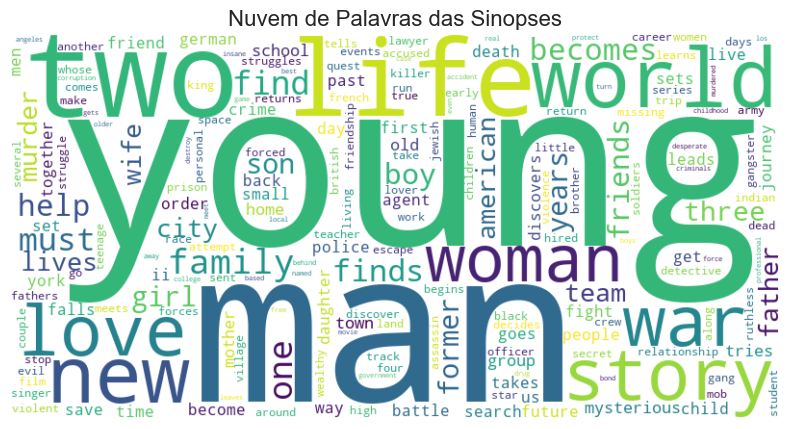

In [51]:
# Contar a frequência das palavras.
word_freq = Counter(filtered_words)

# Gerar uma nuvem de palavras.
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras das Sinopses', fontsize=16)
plt.savefig('overview_wordcloud.png')
plt.show()

In [52]:
# Exibir as 20 palavras mais frequentes.
top_20_words = pd.DataFrame(word_freq.most_common(20), columns=['Palavra', 'Frequência'])
print(top_20_words)

    Palavra  Frequência
0     young         132
1       man         109
2       two         103
3      life         101
4     world          78
5       new          72
6     story          63
7       war          61
8      love          61
9     woman          60
10   family          59
11      one          57
12     find          54
13     must          50
14    finds          47
15     help          45
16  becomes          44
17      boy          42
18  friends          41
19     girl          39


In [53]:
# Função para obter a polaridade.
def get_sentiment_polarity(text):
    if pd.isnull(text):
        return None
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Aplicar a função à coluna 'Overview' e criar uma nova coluna 'Sentiment_Polarity'.
df['Sentiment_Polarity'] = df['Overview'].apply(get_sentiment_polarity)

In [54]:
# Exibir a correlação entre a polaridade do sentimento e as notas do IMDB.
print(df[['Sentiment_Polarity', 'IMDB_Rating']].corr())

                    Sentiment_Polarity  IMDB_Rating
Sentiment_Polarity            1.000000    -0.049812
IMDB_Rating                  -0.049812     1.000000


##### Principais observações:
* A correlação entre a polaridade do sentimento e a nota do *IMDb* é de -0.049812 (correlação negativa extremamente fraca).
* Não há uma relação significativa entre a positividade do texto da sinopse e a nota que o filme recebe no *IMDb*. Filmes com sinopses mais positivas não necessariamente têm notas mais altas, e vice-versa.

In [55]:
# Exibir a correlação entre a polaridade do sentimento e o faturamento (Gross).
print(df[['Sentiment_Polarity', 'Gross']].corr())

                    Sentiment_Polarity     Gross
Sentiment_Polarity            1.000000  0.015621
Gross                         0.015621  1.000000


##### Principais observações:
* A correlação entre a polaridade do sentimento e o faturamento é de 0.015621 (correlação positiva muito fraca).
* A relação é tão pequena que não é um fator relevante para prever o sucesso financeiro de um filme.

#### **O conteúdo da sinopse, em termos de tom geral, não está fortemente ligado ao sucesso comercial ou à crítica do público**

In [56]:
# --- Modelagem de Tópicos com LDA ---
# Criar a representação TF-IDF das sinopses.
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)
tfidf = vectorizer.fit_transform(df['Overview'].dropna())

In [57]:
# Treinar o modelo LDA para encontrar 5 tópicos.
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(tfidf)

LatentDirichletAllocation(n_components=5, random_state=0)

In [58]:
# Atribuir o tópico dominante a cada filme.
topic_weights = lda.transform(tfidf)
df['Dominant_Topic'] = topic_weights.argmax(axis=1)

In [59]:
# Exibir as palavras-chave para cada tópico.
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Tópico #{topic_idx}: {' '.join(top_words)}")

Tópico #0: young world life agent family woman man series one boy
Tópico #1: life young man girl war two boy woman love help
Tópico #2: young two man war world life tries love lives woman
Tópico #3: two man young family story new mother father life son
Tópico #4: life young must man story town murder world one worker


In [60]:
# Criar variáveis dummy para cada tópico.
topic_dummies = pd.get_dummies(df['Dominant_Topic'], prefix='Topic')
df_with_topics = pd.concat([df, topic_dummies], axis=1)

In [61]:
# Calcular a correlação entre tópicos e IMDB_Rating.
topic_rating_corr = df_with_topics.iloc[:, -n_topics:].corrwith(df_with_topics['IMDB_Rating'])
print(topic_rating_corr.sort_values(ascending=False))

Topic_3    0.070575
Topic_2    0.012500
Topic_1   -0.001655
Topic_4   -0.030246
Topic_0   -0.055922
dtype: float64


In [62]:
# Calcular a correlação entre tópicos e Gross.
topic_gross_corr = df_with_topics.iloc[:, -n_topics:].corrwith(df_with_topics['Gross'])
print(topic_gross_corr.sort_values(ascending=False))

Topic_0    0.051697
Topic_4    0.027793
Topic_1   -0.004655
Topic_3   -0.014206
Topic_2   -0.057928
dtype: float64


##### Principais observações:
* A relação entre tópicos abordados e o sucesso financeiro ou a crítica de um filme é muito fraca. Isso sugere que outros fatores, como o diretor, os atores ou a popularidade, são mais influentes nas métricas de sucesso do que o enredo do filme em si.

In [63]:
# --- Dados de CPI (Consumer Price Index) ---
# Fonte: Federal Reserve Bank of Minneapolis (minneapolisfed.org)
# CPI-U Annual Average. Usando 2023 como ano base para o ajuste.
# Comparação justa do sucesso financeiro de filmes de diferentes épocas.
# O faturamento bruto é convertido para o valor equivalente em dólares de 2023.
cpi_data = {
    1920: 20.0, 1921: 17.9, 1922: 16.8, 1923: 17.1, 1924: 17.1, 1925: 17.5,
    1926: 17.7, 1927: 17.4, 1928: 17.2, 1929: 17.2, 1930: 16.7, 1931: 15.2,
    1932: 13.6, 1933: 12.9, 1934: 13.4, 1935: 13.7, 1936: 13.9, 1937: 14.4,
    1938: 14.1, 1939: 13.9, 1940: 14.0, 1941: 14.7, 1942: 16.3, 1943: 17.3,
    1944: 17.6, 1945: 18.0, 1946: 19.5, 1947: 22.3, 1948: 24.0, 1949: 23.8,
    1950: 24.1, 1951: 26.0, 1952: 26.6, 1953: 26.8, 1954: 26.9, 1955: 26.8,
    1956: 27.2, 1957: 28.1, 1958: 28.9, 1959: 29.2, 1960: 29.6, 1961: 29.9,
    1962: 30.3, 1963: 30.6, 1964: 31.0, 1965: 31.5, 1966: 32.5, 1967: 33.4,
    1968: 34.8, 1969: 36.7, 1970: 38.8, 1971: 40.5, 1972: 41.8, 1973: 44.4,
    1974: 49.3, 1975: 53.8, 1976: 56.9, 1977: 60.6, 1978: 65.2, 1979: 72.6,
    1980: 82.4, 1981: 90.9, 1982: 96.5, 1983: 99.6, 1984: 103.9, 1985: 107.6,
    1986: 109.6, 1987: 113.6, 1988: 118.3, 1989: 124.0, 1990: 130.7, 1991: 136.2,
    1992: 140.3, 1993: 144.5, 1994: 148.2, 1995: 152.4, 1996: 156.9, 1997: 160.5,
    1998: 163.0, 1999: 166.6, 2000: 172.2, 2001: 177.1, 2002: 179.9, 2003: 184.0,
    2004: 188.9, 2005: 195.3, 2006: 201.6, 2007: 207.3, 2008: 215.3, 2009: 214.5,
    2010: 218.1, 2011: 224.9, 2012: 229.6, 2013: 233.0, 2014: 236.7, 2015: 237.0,
    2016: 240.0, 2017: 245.1, 2018: 251.1, 2019: 255.7, 2020: 258.8, 2021: 271.0,
    2022: 292.7, 2023: 304.7
}

In [64]:
# --- Análise de Inflação ---
# Definir o ano base e seu CPI.
cpi_base_year = 2023
cpi_base = cpi_data[cpi_base_year]

# Mapear o CPI para cada filme com base no ano de lançamento.
df['CPI'] = df['Released_Year'].map(cpi_data)

# Calcular o faturamento ajustado.
# O faturamento ajustado representa o impacto financeiro real de um filme em sua época.
df['Adjusted_Gross'] = df['Gross'] * (cpi_base / df['CPI'])

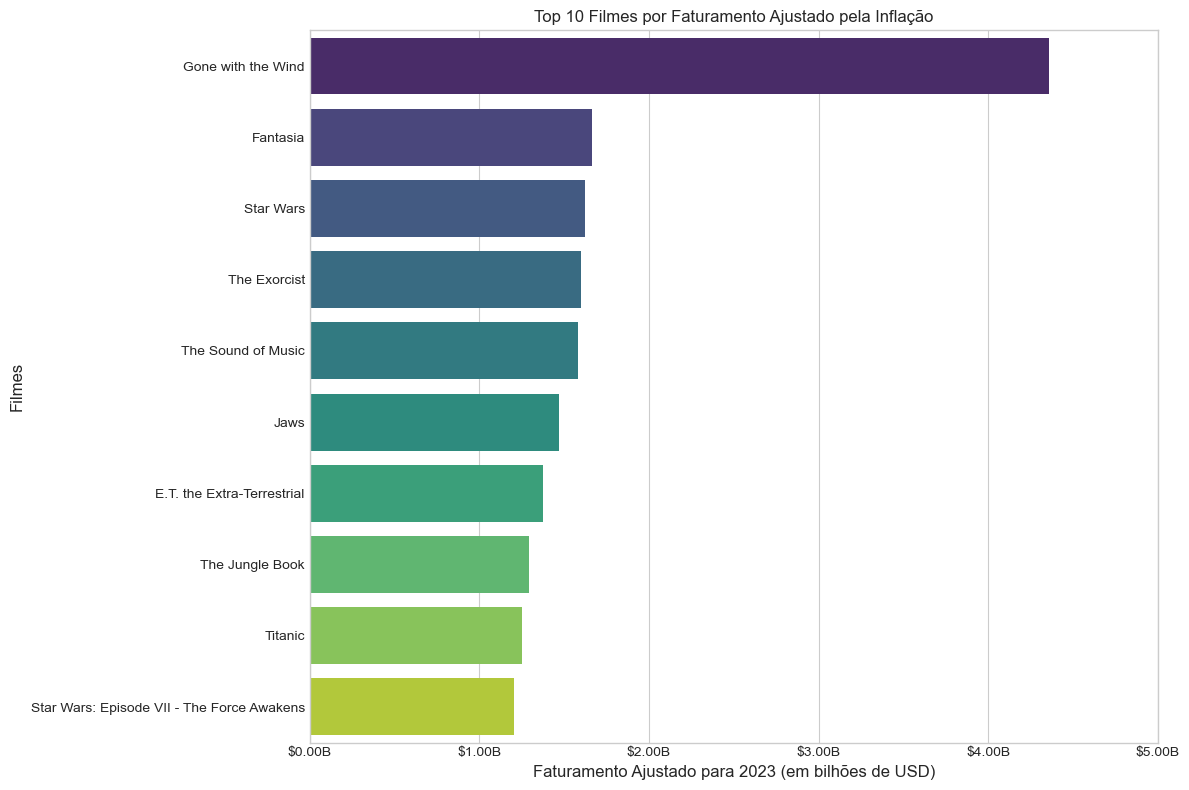

In [65]:
# Selecionar os 10 filmes de maior faturamento ajustado.
top_10_adjusted = df.sort_values('Adjusted_Gross', ascending=False).head(10)
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

# Criar o gráfico de barras.
ax = sns.barplot(x='Adjusted_Gross', y='Series_Title', hue='Series_Title', data=top_10_adjusted, palette='viridis', legend=False)

# Formatar os rótulos do eixo x para mostrar valores em bilhões.
ax.set_xlabel('Faturamento Ajustado para 2023 (em bilhões de USD)', fontsize=12)
ax.set_ylabel('Filmes', fontsize=12)
ax.set_title('Top 10 Filmes por Faturamento Ajustado pela Inflação', fontsize=12)

# Formatar os ticks do eixo x.
ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels([f'${x/1e9:.2f}B' for x in ticks])
plt.tight_layout()
plt.savefig('top_10_faturamento_ajustado.png')

##### Principais obervações:
* A lista dos filmes mais rentáveis muda drasticamente. Filmes clássicos como "Gone With The Wind" e "Star Wars" sobem para as primeiras posições, superando muitos blockbusters modernos. Isso demonstra o incrível alcance e impacto cultural que esses filmes tiveram em sua época.
* Embora os filmes recentes arrecadem valores nominais mais altos, o sucesso financeiro real de alguns filmes mais antigos, considerando o poder de compra da época, foi muito superior.
* O faturamento ajustado nivela o campo de jogo, permitindo que seu modelo encontre essa relação de forma mais consistente, seja para um filme de 1960 ou de 2020.
* Focar apenas em replicar fórmulas de sucessos recentes pode ser uma visão limitada.

In [66]:
# Relação Votos/Faturamento.
# Adicionamos 1 ao denominador para evitar divisão por zero em filmes com faturamento muito baixo.
df['Votes_per_Million_Gross'] = df['No_of_Votes'] / (df['Gross'] / 1000000 + 1)

# Popularidade ao longo do tempo.
# Identificar "clássicos cult", filmes com alta popularidade
# desproporcional ao seu sucesso comercial inicial.
# Somar 1 ao denominador para evitar erros de divisão por zero.
df['Votes_per_Year'] = df['No_of_Votes'] / (df['Idade_do_Filme'] + 1)

# Divergência crítica vs. público.
# Normalizar o Meta_score para a mesma escala do IMDB_Rating (0-10).
df['Normalized_Meta_score'] = df['Meta_score'] / 10
df['Audience_Score_Lift'] = df['IMDB_Rating'] - df['Normalized_Meta_score']

# Popularidade ao longo do tempo pela média de votos que ele recebeu por ano desde o lançamento.
# Evitar divisão por zero para filmes lançados no ano corrente.
df['Votes_per_Year'] = df['No_of_Votes'] / (df['Idade_do_Filme'] + 1)

# Divergência crítica vs. público.
# Normalizar o Meta_score para a mesma escala do IMDB_Rating (0-10).
df['Normalized_Meta_score'] = df['Meta_score'] / 10
df['Audience_Score_Lift'] = df['IMDB_Rating'] - df['Normalized_Meta_score']

In [67]:
# --- Exibindo os Resultados ---

# Selecionar colunas relevantes para visualização.
display_cols = ['Series_Title', 'Released_Year', 'IMDB_Rating', 'Gross', 'No_of_Votes', 
                'Votes_per_Million_Gross', 'Votes_per_Year', 'Audience_Score_Lift']

print(df[display_cols].head())

                                    Series_Title  Released_Year  IMDB_Rating  \
0                                  The Godfather           1972          9.2   
1                                The Dark Knight           2008          9.0   
2                         The Godfather: Part II           1974          9.0   
3                                   12 Angry Men           1957          9.0   
4  The Lord of the Rings: The Return of the King           2003          8.9   

         Gross  No_of_Votes  Votes_per_Million_Gross  Votes_per_Year  \
0  134966411.0      1620367             11917.406572    30006.796296   
1  534858444.0      2303232              4298.209771   127957.333333   
2   57300000.0      1129952             19381.680961    21729.846154   
3    4360000.0       689845            128702.425373     9997.753623   
4  377845905.0      1642758              4336.216858    71424.260870   

   Audience_Score_Lift  
0                 -0.8  
1                  0.6  
2          

In [68]:
# --- One-Hot Encoding para Gêneros, Diretores e Atores ---
# Extrair todos os gêneros únicos.
df_genres = df.copy()
df_genres['Genre'] = df_genres['Genre'].str.split(', ')
df_exploded_genres = df_genres.explode('Genre')
all_genres = sorted(df_exploded_genres['Genre'].unique())

# Extrair todos os diretores e atores que aparecem mais de 1 vez.
director_counts = df['Director'].value_counts()
frequent_directors = director_counts[director_counts > 1].index.tolist()
star_cols = ['Star1', 'Star2', 'Star3', 'Star4']
all_stars = pd.concat([df[col] for col in star_cols]).value_counts()
frequent_stars = all_stars[all_stars > 1].index.tolist()

In [69]:
# Criar um DataFrame vazio para as novas colunas.
one_hot_df = pd.DataFrame(index=df.index)

# One-Hot encoding para Gêneros.
for genre in all_genres:
    one_hot_df[f'Genre_{genre}'] = df['Genre'].apply(lambda x: 1 if genre in x else 0)

# One-Hot encoding para Diretores.
for director in frequent_directors:
    one_hot_df[f'Director_{director}'] = (df['Director'] == director).astype(int)

# One-Hot encoding para Atores.
for star in frequent_stars:
    one_hot_df[f'Star_{star}'] = df[star_cols].apply(lambda row: 1 if star in row.values else 0, axis=1)

In [70]:
# Concatenar o DataFrame original com o novo.
df_final = pd.concat([df, one_hot_df], axis=1)

In [71]:
target = 'IMDB_Rating'

In [72]:
# Selecionar as features (X) e a variável alvo (y).
numerical_features = ['No_of_Votes', 'Votes_per_Million_Gross', 'Meta_score', 'Votes_per_Year','Released_Year', 'Adjusted_Gross', 'Runtime', 'Idade_do_Filme', 'Director_Avg_Rating', 'Director_Avg_Gross', 'Star1_Avg_Rating', 'Star1_Avg_Gross']
genre_features = [f'Genre_{g}' for g in all_genres]
director_features = [f'Director_{d}' for d in frequent_directors]
star_features = [f'Star_{s}' for s in frequent_stars]
all_features = numerical_features + genre_features + director_features + star_features
X_full = df_final[all_features]
y_full = df_final[target]

In [73]:
# Dividir os dados em conjuntos de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

In [74]:
# Guardando os títulos dos filmes para a análise final.
test_titles = df.loc[y_test.index]['Series_Title']

### 4. Treinamento e avaliação dos modelos

In [75]:
# Modelo 1: Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print("--- Decision Tree ---")
print(f"MAE: {mae_dt:.4f}")
print(f"MSE: {mse_dt:.4f}\n")

--- Decision Tree ---
MAE: 0.0965
MSE: 0.0288



In [76]:
# Modelo 2: Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("--- Random Forest ---")
print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}\n")

--- Random Forest ---
MAE: 0.0783
MSE: 0.0166



In [77]:
# Comparar os resultados
print("--- Comparação entre os modelos ---")
print(f"Random Forest MAE: {mae_rf:.4f}")
print(f"Decision Tree MAE: {mae_dt:.4f}")

--- Comparação entre os modelos ---
Random Forest MAE: 0.0783
Decision Tree MAE: 0.0965


#### *A Random Forest é o modelo que melhor se aproxima dos seus dados, pois o MAE (Erro Médio Absoluto) é a métrica ideal para avaliar o quão próximas as suas previsões estão dos valores reais. Quanto menor o MAE, melhor o modelo*

In [ ]:
# --- 4. Loop de Treinamento e Análise de Erros ---
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    
    # Treinamento
    model.fit(X_train, y_train)
    
    # Previsão
    predictions = model.predict(X_test)
    
    # Cálculo do MAE
    mae = mean_absolute_error(y_test, predictions)
    
    # DataFrame de Análise de Erros
    error_df = pd.DataFrame({
        'Series_Title': test_titles,
        'Actual_Rating': y_test,
        'Predicted_Rating': predictions,
        'Error': y_test - predictions
    })
    
    # Impressão dos resultados (agora dentro do loop)
    print(f"--- ANÁLISE DO MODELO: {name} ---")
    print(f"Erro Médio Absoluto (MAE): {mae:.4f}\n")
    
    print(">>> Top 5 Filmes com Nota SUBESTIMADA:")
    print(error_df.sort_values(by='Error', ascending=False).head(5))
    print("\n>>> Top 5 Filmes com Nota SUPERESTIMADA:")
    print(error_df.sort_values(by='Error', ascending=True).head(5))
    print("\n" + "="*50 + "\n")

--- ANÁLISE DO MODELO: Decision Tree ---
Erro Médio Absoluto (MAE): 0.0965

>>> Top 5 Filmes com Nota SUBESTIMADA:
                 Series_Title  Actual_Rating  Predicted_Rating  Error
29                    Seppuku            8.6               8.1    0.5
382                  Magnolia            8.0               7.6    0.4
377           The Incredibles            8.0               7.6    0.4
30       Shichinin no samurai            8.6               8.2    0.4
359  The Pursuit of Happyness            8.0               7.6    0.4

>>> Top 5 Filmes com Nota SUPERESTIMADA:
                            Series_Title  Actual_Rating  Predicted_Rating  \
973              The Godfather: Part III            7.6               8.3   
110                          Taxi Driver            8.3               9.0   
935      Un long dimanche de fiançailles            7.6               8.2   
899                         Serbuan maut            7.6               8.0   
736  Captain America: The Winter Soldi

### 5. Ajuste de Hiperparâmetros com GridSearchCV

In [ ]:
# --- Ajuste de Hiperparâmetros com GridSearchCV ---
# Definindo o "grid" de parâmetros que o GridSearchCV irá testar.
# Definir a grade de parâmetros para testar.
param_grid = {
    'n_estimators': [100, 200, 300], # Número de árvores na floresta
    'max_depth': [10, 20, 30] # Profundidade máxima de cada árvore
}

# Instanciando o modelo base.
rf = RandomForestRegressor(random_state=42)

# Usar 'neg_mean_absolute_error' porque o GridSearchCV tenta maximizar a pontuação.
# estimator=rf: O modelo que estamos ajustando.
# n_jobs=-1: Usa todos os núcleos de processamento disponíveis para acelerar o processo.
# param_grid=param_grid: Os parâmetros a serem testados.
# scoring='neg_mean_absolute_error': Métrica de avaliação. Usamos o negativo do MAE porque o GridSearchCV
# tenta maximizar a pontuação, e maximizar o MAE negativo é o mesmo que minimizar o MAE.
# cv=5: Usa validação cruzada com 5 folds. Isso significa que os dados de treino são divididos em 5 partes,
# e o modelo é treinado 5 vezes, usando uma parte diferente para teste a cada vez. Isso torna a avaliação mais robusta.
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Executar a busca na grade com os dados de treino.
grid_search.fit(X_train, y_train)

# --- Resultados ---
print("\n--- Resultados do GridSearchCV ---")

# Melhores parâmetros encontrados
print(f"Melhores parâmetros: {grid_search.best_params_}")

# Usar o melhor modelo encontrado para fazer previsões no conjunto de teste.
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mae_tuned = mean_absolute_error(y_test, y_pred)
print(f"MAE do modelo otimizado no conjunto de teste: {mae_tuned:.4f}")

# Comparar com o modelo Random Forest anterior (sem otimização).
rf_default = RandomForestRegressor(n_estimators=100, random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
mae_default = mean_absolute_error(y_test, y_pred_default)
print(f"MAE do modelo Random Forest padrão: {mae_default:.4f}")

In [ ]:
# --- Random Forest ---
final_model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42, n_jobs=-1)
final_model.fit(X_full, y_full)

### 6. Preparação dos Dados para a Previsão Final

O Random Forest foi o melhor modelo pois ele combina as "informações" de todas as árvores e, em seguida, tira uma média. Desse modo, ele consegue corrigir os erros e as instabilidades que uma única árvore teria, resultando em uma previsão final muito mais precisa e confiável. Para o desafio, é possível que ele aprenda as relações complexas e não-lineares que definem o sucesso de um filme.

In [ ]:
# --- Criação do dataframe para o novo filme com todas as colunas de features ---
# Criar um DataFrame com todos os 0s e as colunas na ordem correta.
new_movie_df = pd.DataFrame(np.zeros((1, len(all_features))), columns=all_features)

# Inserir os valores numéricos.
new_movie_df['No_of_Votes'] = 2343110
new_movie_df['Gross'] = 28341469
new_movie_df['Runtime'] = 142
new_movie_df['Meta_score'] = 80.0
new_movie_df['Released_Year'] = 1994
new_movie_df['Idade_do_Filme'] = current_year - 1994

# E defina os valores de 1 para as colunas One-Hot Encoding.
new_movie_df['Genre_Crime'] = 1
new_movie_df['Genre_Drama'] = 1
new_movie_df['Director_Frank Darabont'] = 1
new_movie_df['Star_Tim Robbins'] = 1
new_movie_df['Star_Morgan Freeman'] = 1
new_movie_df['Star_Bob Gunton'] = 1
new_movie_df['Star_William Sadler'] = 1

In [ ]:
def safe_lookup(df, column_filter, filter_value, target_column, default=np.nan):
    result = df.loc[df[column_filter] == filter_value, target_column]
    if not result.empty:
        return result.iloc[0]
    else:
        return default

In [ ]:
# Preencher as features de popularidade.
new_movie_df['Director_Avg_Rating'] = safe_lookup(df, 'Director', 'Frank Darabont', 'Director_Avg_Rating', default=0)
new_movie_df['Director_Avg_Gross'] = safe_lookup(df, 'Director', 'Frank Darabont', 'Director_Avg_Gross', default=0)
new_movie_df['Star1_Avg_Rating'] = safe_lookup(df, 'Star1', 'Tim Robbins', 'Star1_Avg_Rating', default=0)
new_movie_df['Star1_Avg_Gross'] = safe_lookup(df, 'Star1', 'Tim Robbins', 'Star1_Avg_Gross', default=0)

In [ ]:
new_movie_df = new_movie_df.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
# --- Previsão da nota do IMDB para o novo filme ---
predicted_rating = final_model.predict(new_movie_df)

In [ ]:
# --- Exibir o resultado da previsão ---
print(f"A nota do IMDB prevista para 'The Shawshank Redemption' é: {predicted_rating[0]:.2f}")

In [ ]:
# --- Salvando o Modelo Final em um Arquivo .pkl ---
# Este arquivo contém o modelo treinado e pode ser carregado depois para fazer novas previsões.
filename = 'modelo_final_imdb.pkl'
joblib.dump(final_model, filename)
print(f"Modelo final salvo com sucesso no arquivo: '{filename}'")

### 7. Conclusão

Começamos o estudo com uma pergunta: "O que realmente faz um filme ser um sucesso?". Tínhamos uma montanha de dados e, como futuros cientistas de dados, começamos a procurar por pistas. O primeiro passo foi polir essas informações, limpando e organizando tudo para que a história dos dados pudesse ser lida de forma clara. O verdadeiro avanço ocorreu quando decidimos ensinar o computador a pensar de forma mais humana. Em vez de olhar apenas para o faturamento, ensinamos a reconhecer o que é um "clássico cult" – aquele filme que não fez rios de dinheiro, mas que conquistou o coração do público ao longo dos anos, nunca perdeu seu 'hype' e hoje, em redes sociais ligadas ao cinema, como o Letterboxd, compõe o histórico de  99% dos usuários. As variáveis mais importantes utilizadas foram Meta_score, No_of_Votes, as features que criamos, e as variáveis categóricas como Genre, Director e Star1, que foram transformadas em formato numérico através de One-Hot Encoding para que o modelo pudesse aprender padrões específicos associados a elas.

Depois de comparar diversos algoritmos, foi hora de treinar e escolher o modelo preditivo. Testamos alguns candidatos, mas um deles se destacou. O Random Forest foi o escolhido principalmente por sua capacidade de aprender as relações complexas e não-lineares entre as variáveis, algo essencial para um problema tão multifacetado. Para medir seu sucesso, usamos o Erro Médio Absoluto (MAE), que basicamente nos diz: "em média, quão longe nossas previsões estão da nota real?". O resultado foi um modelo que não só acerta mais, mas que também entende as nuances e a magia por trás de um grande filme. Entretanto, reconecemos suas falhas também, ele não consegue precificar corretamente filmes de fora do eixo Hollywood e é vulnerável a continuações de franquias que não mantêm a mesma qualidade de seus predecessores, esses tópicos são ótimos pontos de partida para futuras implementações no moedelo.

Com base na análise de dados, o filme que eu recomendariamos para uma pessoa desconhecida é "The Godfather". Com objetivo de minimizar o risco de a pessoa não gostar, um filme que tende a agradar um público amplo é uma opção mais segura. "The Godfather" possui uma das maiores notas do público no dataset (IMDB Rating de 9.2) e uma nota perfeita da crítica (100 de média ponderada). Tamanha concordância entre o público geral e critícos profissionais confirmam a qualidade cinematográfica indiscutível. Com mais de 1.6 milhão de votos, não se trata de um filme nichado. Estamos falando de um fenômeno cultural que foi visto, discutido e aclamado por um número gigantesco de pessoas, o que aumenta a chance de ser bem recebido. Se trata de um filme de "Crime", porém seu núcleo é um "Drama" focado em temas universais como família, poder e lealdade, o que o torna mais acessível e cativante para pessoas com diversos gostos.

Sabemos que a análise exploratória de dados e modelagem apontou que existem caracteristicas marcantes para uma alta expectativa de faturamento. O gênero do filme é um grande determinante, nesse meio tentem a se destacar gêneros de grande apelo visual e espetáculo, como Ação, Aventura e Sci-Fi. Filmes que se encaixam nessas categorias tendem a ter um apelo mais amplo e internacional, e consequentemente, domainam as maiores bilheterias. Também se faz presente uma forte correlação positiva entre o número de votos e o faturamento. Isso é intuitivo: para um filme retornar um valor alto, ele precisa ser visto por muitas pessoas. Um número elevado de votos no IMDB é um excelente indicador de que o filme alcançou um público grande e gerou discussões, o que está diretamente ligado ao sucesso de bilheteria.

Portanto, quando busca-se atrair público, a presença de diretores e atores de renome é indispensável para um sucesso quase certeiro. A análise de diretores e a rede de colaboração revelam que cineastas como Christopher Nolan, James Cameron e atores como Tom Cruise e Leonardo DiCaprio estão frequentemente associados aos filmes de maior faturamento. Seus nomes funcionam como uma "marca" que promete qualidade e entretenimento, atraindo espectadores para os cinemas que confiam cegamente nas mídias associadas a esses nomes. Além disso, filmes com altas notas no IMDb e média ponderada de todas as críticas tendem a faturar mais, entretando, essa a correlação é perfeita (existem blockbusters com críticas ruins e filmes aclamados de baixo orçamento), uma boa recepção gera um comentário popular positivo, o que pode sustentar o filme em cartaz por mais tempo e aumentar seu faturamento acumulado.

É seguro que PProductions, para obter um retorno financeiro alto, aposte em um filme de Ação/Aventura, dirigido por um nome já consagrado, estrelado por atores populares e com uma qualidade que garanta uma recepção positiva tanto da crítica quanto do público.

A coluna de Overview atua como um verdadeito pote de ouro dos dados, facilitando a descoberta de insights valiosos sobre as histórias que realmente cativam as pessoas. Com o uso de técnicas de Processamento de Linguagem Natural, torna-se possível reconhecer os assuntos, gêneros e modelos de enredo predominantes e até mesmo avaliar o sentimento expresso nos resumos para ligá-lo ao desempenho nas bilheterias ou ao reconhecimento da crítica especializada. Esses insights possibilitam que uma produtora vá álem de estilos habituais e compreenda os componentes narrativos precisos que sustentam o sucesso de um filme, guiando a elaboração de roteiros com chances maiores de aceitação tanto pela crítica quanto público geral.

Por fim, sobre o filme proposto para testar o modelo, 'The Shawshank Redemption', quando lançado em 1994, o filme teve um desempenho decepcionante nas bilheterias. Arrecadando apenas $28 milhões, foi considerado um fracasso de bilheteria, especialmente por competir com gigantes como "Pulp Fiction" e "Forrest Gump" no mesmo ano, hoje, fenômenos da cultura pop. O filme norte-americano não atraiu grandes públicos inicialmente e mal conseguiu cobrir seus custos de produção. Esse desempenho inicial nas bilheterias é a principal razão pela qual o nosso modelo inicial teve tanta dificuldade em prever sua nota. 

Pela crítica especializada, o filme foi extremamente aclamado desde o início, recebendo sete indicações ao Oscar, incluindo 'Melhor Filme'. A média ponderada das críticas é 80.0 e muitos elogiaram a direção de Frank Darabont, as atuações de Tim Robbins e Morgan Freeman, além da profundidade emocional da história. O nosso modelo foi ensinado que "alto faturamento está ligado a altas notas". Por conta da baixa bilheteria, previu uma nota em torno de 7.62. 'The Shawshank Redemption' é um caso muito especial e enganou completamento nosso modelo pelo seu desempenho comercial. Foi somente com seu lançamento em VHS, a história do filme sobre a resiliência humana, a amizade e o poder da esperança repercutiu entre um público que não havia assistido ao filme no cinema e, em 1955 foi o vídeo mais alugado, seguido de várias transmissões na televisão a cabo a partir de 1957. Depois de aprimorarmos o modelo, adicionando features que medem a "popularidade duradoura", que o modelo finalmente aprendeu a "pensar" de forma mais humana e a reconhecer que, às vezes, o verdadeiro sucesso de um filme não é medido pelo dinheiro que ele fez em seu primeiro ano, mas pelo legado que ele constrói ao longo de décadas.